# ***Preparación de datos***
1. Integración de los datos
2. Eliminar variables irrelevantes y redundantes
3. Descripción estadística de los datos
4. Limpieza de datos: atípicos y nulos
5. Análisis de correlaciones: redundancias entre todas las variables e irrelevancias respecto a la objetivo
6. Balanceo de datos (si es necesario)
7. Transformación de tipo de variable según método de ML
8. Guardar los datos preparados

In [24]:
import pandas as pd # Dataframe manipulation
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Graphics

# ***1. Integración de los datos***

***Los datos ya se encuentran completos en una tabla***

In [25]:
# Se cargan los datos de la tabla
data = pd.read_csv("../Data/final_depression_dataset.csv")
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [27]:
# Corrección de tipo de datos object a categorías
data['Name'] = data['Name'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['City'] = data['City'].astype('category')
data['Working Professional or Student'] = data['Working Professional or Student'].astype('category')
data['Profession'] = data['Profession'].astype('category')
data['Academic Pressure'] = data['Academic Pressure'].astype('category')
data['Work Pressure'] = data['Work Pressure'].astype('category')
data['Study Satisfaction'] = data['Study Satisfaction'].astype('category')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('category')
data['Financial Stress'] = data['Financial Stress'].astype('category')
data['Sleep Duration'] = data['Sleep Duration'].astype('category')
data['Dietary Habits'] = data['Dietary Habits'].astype('category')
data['Degree'] = data['Degree'].astype('category')
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].astype('category')
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].astype('category')
data['Depression'] = data['Depression'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Name                                   2556 non-null   category
 1   Gender                                 2556 non-null   category
 2   Age                                    2556 non-null   int64   
 3   City                                   2556 non-null   category
 4   Working Professional or Student        2556 non-null   category
 5   Profession                             1883 non-null   category
 6   Academic Pressure                      502 non-null    category
 7   Work Pressure                          2054 non-null   category
 8   CGPA                                   502 non-null    float64 
 9   Study Satisfaction                     502 non-null    category
 10  Job Satisfaction                       2054 non-null   categ

# ***2. Eliminar variables irrelevantes y redundantes***

In [28]:
# Variables irrelevantes para el proceso de minería
data = data.drop(['Name'], axis=1) # Axis = 1 para eliminar la columna
data.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [29]:
data.sample(8)

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
618,Male,53,Indore,Working Professional,Content Writer,NaN,4.0,NaN,NaN,3.0,More than 8 hours,Moderate,BSc,Yes,11,5,Yes,No
500,Male,58,Agra,Working Professional,Electrician,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Unhealthy,ME,No,1,1,No,No
343,Male,56,Patna,Working Professional,Pharmacist,NaN,4.0,NaN,NaN,3.0,More than 8 hours,Moderate,M.Pharm,Yes,9,5,Yes,No
1116,Female,54,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,1.0,7-8 hours,Unhealthy,BA,Yes,1,1,Yes,No
375,Female,20,Meerut,Working Professional,NaN,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Moderate,Class 12,Yes,0,2,No,Yes
1377,Female,53,Bangalore,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,5-6 hours,Moderate,MD,Yes,4,1,No,No
828,Male,42,Nagpur,Working Professional,Doctor,NaN,5.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,Yes,8,2,Yes,No
205,Male,53,Srinagar,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,5-6 hours,Unhealthy,B.Pharm,No,1,1,Yes,No


# ***3. Descripción estadística de los datos***

In [30]:
# Conocemos un poco los datos numéricos
data.describe()

,Age,CGPA,Work/Study Hours
count,2556.000000,502.000000,2556.000000
mean,39.043036,7.567809,6.023865
std,12.260596,1.465367,3.771743
min,18.000000,5.030000,0.000000
25%,28.000000,6.210000,3.000000
50%,39.000000,7.605000,6.000000
75%,50.000000,8.825000,9.000000
max,60.000000,10.000000,12.000000


In [36]:
from ydata_profiling import ProfileReport

profile_data = ProfileReport(data, minimal=True)
profile_data

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [273]:
# Guardamos en html el perfilado de datos
profile_data.to_file(output_file="data_profile_unprepared.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 125.91it/s]


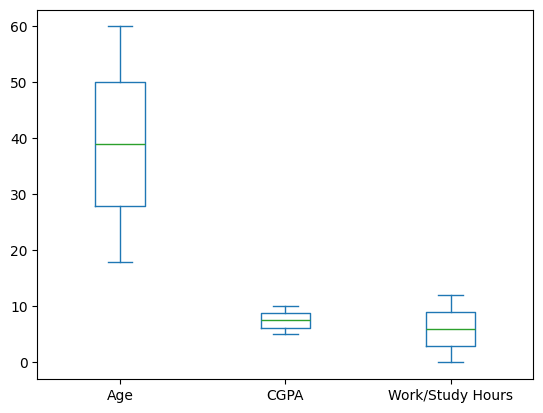

In [274]:
data.plot.box()
plt.show()

# ***4. Limpieza de datos: atípicos y nulos***

***Thanks to the statistical description, it is known that there are no outliers, however there are a lot of nulls.***

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 2556 non-null   category
 1   Age                                    2556 non-null   int64   
 2   City                                   2556 non-null   category
 3   Working Professional or Student        2556 non-null   category
 4   Profession                             1883 non-null   category
 5   Academic Pressure                      502 non-null    category
 6   Work Pressure                          2054 non-null   category
 7   CGPA                                   502 non-null    float64 
 8   Study Satisfaction                     502 non-null    category
 9   Job Satisfaction                       2054 non-null   category
 10  Sleep Duration                         2556 non-null   categ

In [276]:
nulos_count = data.isnull().sum()
nulos_percentage = (nulos_count / len(data)) * 100

In [277]:
# Dataframe with the count and percentage of missing values
nulos_df = pd.DataFrame({
    'Nulos': nulos_count,
    'Porcentaje (%)': nulos_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

nulos_df

,Nulos,Porcentaje (%)
CGPA,2054,80.359937
Academic Pressure,2054,80.359937
Study Satisfaction,2054,80.359937
Profession,673,26.330203
Work Pressure,502,19.640063
Job Satisfaction,502,19.640063
Age,0,0.000000
Gender,0,0.000000
City,0,0.000000
Working Professional or Student,0,0.000000


***These data are mostly from professionals, not many students were interviewed. Therefore there is a correlation between the columns of Satisfaction and the columns of Pressure, the professionals that do not have data in 'Academic Pressure' is because they already have in 'Job pressure', and the same happens with satisfaction.***

***For this reason there are also many nulls in CGPA but in this column there is no way to join it with any, so it is best to eliminate it.***

In [278]:
data['Profession'].value_counts()

Profession
Teacher                   322
Content Writer            116
HR Manager                 84
Pharmacist                 75
Architect                  73
Consultant                 72
Business Analyst           71
Doctor                     66
Entrepreneur               63
Chef                       59
Chemist                    59
Lawyer                     48
Travel Consultant          46
Researcher                 45
Educational Consultant     44
Manager                    42
Data Scientist             42
Judge                      42
Customer Support           41
Marketing Manager          39
Pilot                      39
Finanancial Analyst        38
Financial Analyst          36
Plumber                    35
Software Engineer          34
Electrician                33
Sales Executive            32
Digital Marketer           31
Civil Engineer             31
Mechanical Engineer        30
Graphic Designer           26
UX/UI Designer             26
Accountant                 17

In [262]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

var_categoricas = ['Profession']

#Imputacion de variables categóricas: moda
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[var_categoricas] = ImpCategorias.fit_transform(data[var_categoricas])

# Imputate values for numerical variables
print(ImpCategorias.statistics_)

['Teacher']


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 2556 non-null   category
 1   Age                                    2556 non-null   int64   
 2   City                                   2556 non-null   category
 3   Working Professional or Student        2556 non-null   category
 4   Profession                             2556 non-null   object  
 5   Academic Pressure                      502 non-null    category
 6   Work Pressure                          2054 non-null   category
 7   CGPA                                   502 non-null    float64 
 8   Study Satisfaction                     502 non-null    category
 9   Job Satisfaction                       2054 non-null   category
 10  Sleep Duration                         2556 non-null   categ

In [264]:
# Fill null values by combining columns
data['Job/Study Satisfaction'] = data['Job Satisfaction'].fillna(data['Study Satisfaction'])
data['Work/Academic Pressure'] = data['Academic Pressure'].fillna(data['Work Pressure'])

# Ensure that 'Student' is a valid category in 'Profession'
if 'Student' not in data['Profession'].cat.categories:
    data['Profession'] = data['Profession'].cat.add_categories('Student')

# Fill 'Profession' with 'Student'
data.loc[(data['Working Professional or Student'] == 'Student')] = 'Student'

# Drop unnecessary columns
data.drop(columns=['Job Satisfaction', 'Study Satisfaction', 'Academic Pressure', 'Work Pressure'], inplace=True)
data.head()


AttributeError: Can only use .cat accessor with a 'category' dtype

In [176]:
nulos_count = data.isnull().sum()
nulos_percentage = (nulos_count / len(data)) * 100

# Dataframe with the count and percentage of missing values
nulos_df = pd.DataFrame({
    'Nulos': nulos_count,
    'Porcentaje (%)': nulos_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

nulos_df

,Nulos,Porcentaje (%)
CGPA,2054,80.359937
Profession,171,6.690141
Gender,0,0.000000
Age,0,0.000000
Working Professional or Student,0,0.000000
City,0,0.000000
Sleep Duration,0,0.000000
Dietary Habits,0,0.000000
Degree,0,0.000000
Have you ever had suicidal thoughts ?,0,0.000000


***CGPA is missing more than 80% of the data, therefore this column will be eliminated.***

***The number of nulls for Profession are less than 30%, therefore they will be imputed by mode.***

In [177]:
# column to drop because of the high percentage of missing values
data = data.drop(columns='CGPA')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 2556 non-null   category
 1   Age                                    2556 non-null   int64   
 2   City                                   2556 non-null   category
 3   Working Professional or Student        2556 non-null   category
 4   Profession                             2385 non-null   category
 5   Sleep Duration                         2556 non-null   category
 6   Dietary Habits                         2556 non-null   category
 7   Degree                                 2556 non-null   category
 8   Have you ever had suicidal thoughts ?  2556 non-null   category
 9   Work/Study Hours                       2556 non-null   int64   
 10  Financial Stress                       2556 non-null   categ

In [181]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

var_categoricas = ['Profession']

#Imputacion de variables categóricas: moda
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[var_categoricas] = ImpCategorias.fit_transform(data[var_categoricas])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 2556 non-null   category
 1   Age                                    2556 non-null   int64   
 2   City                                   2556 non-null   category
 3   Working Professional or Student        2556 non-null   category
 4   Profession                             2556 non-null   object  
 5   Sleep Duration                         2556 non-null   category
 6   Dietary Habits                         2556 non-null   category
 7   Degree                                 2556 non-null   category
 8   Have you ever had suicidal thoughts ?  2556 non-null   category
 9   Work/Study Hours                       2556 non-null   int64   
 10  Financial Stress                       2556 non-null   categ

In [182]:
# Imputate values for numerical variables
print(ImpCategorias.statistics_)

['Student']


In [185]:
data.to_excel("data_cleaned.xlsx", index=False)

# ***5. Análisis de correlaciones: redundancias entre todas las variables e irrelevancias respecto a la objetivo***

In [ ]:
data.corr()

ValueError: could not convert string to float: 'Sí'

In [ ]:
data_num = pd.get_dummies(data, drop_first=True, dtype=int)
data_num.head()

,Hijos,Sueldo,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Fuga_Sí
0,0.0,10000.0,7.0,15.0,1,0,0,0,0
1,1.0,20000.0,3.0,3.0,0,1,0,1,1
2,2.0,15000.0,5.0,10.0,1,1,1,0,1
3,1.0,30000.0,15.0,7.0,1,1,0,1,0
4,0.0,10000.0,1.0,6.0,1,1,1,0,1


In [ ]:
# Correlaciones
data_num.corr()

,Hijos,Sueldo,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Fuga_Sí
Hijos,1.000000,-0.088208,-0.009335,-0.043236,0.651359,0.441850,0.626839,-0.326711,-0.286804
Sueldo,-0.088208,1.000000,0.014302,0.524112,-0.275918,-0.262990,-0.266518,0.611942,-0.083314
Incapacidades,-0.009335,0.014302,1.000000,-0.164894,0.039897,-0.330893,-0.249287,0.403594,-0.444169
Antiguedad,-0.043236,0.524112,-0.164894,1.000000,0.166948,-0.207404,-0.034004,-0.003403,-0.033314
Casado_Sí,0.651359,-0.275918,0.039897,0.166948,1.000000,0.259807,0.599620,-0.490593,-0.338676
Carro_Sí,0.441850,-0.262990,-0.330893,-0.207404,0.259807,1.000000,0.490941,-0.124544,0.265097
Casa_Prop,0.626839,-0.266518,-0.249287,-0.034004,0.599620,0.490941,1.000000,-0.388352,0.051885
Sexo_M,-0.326711,0.611942,0.403594,-0.003403,-0.490593,-0.124544,-0.388352,1.000000,0.057676
Fuga_Sí,-0.286804,-0.083314,-0.444169,-0.033314,-0.338676,0.265097,0.051885,0.057676,1.000000


<Axes: >

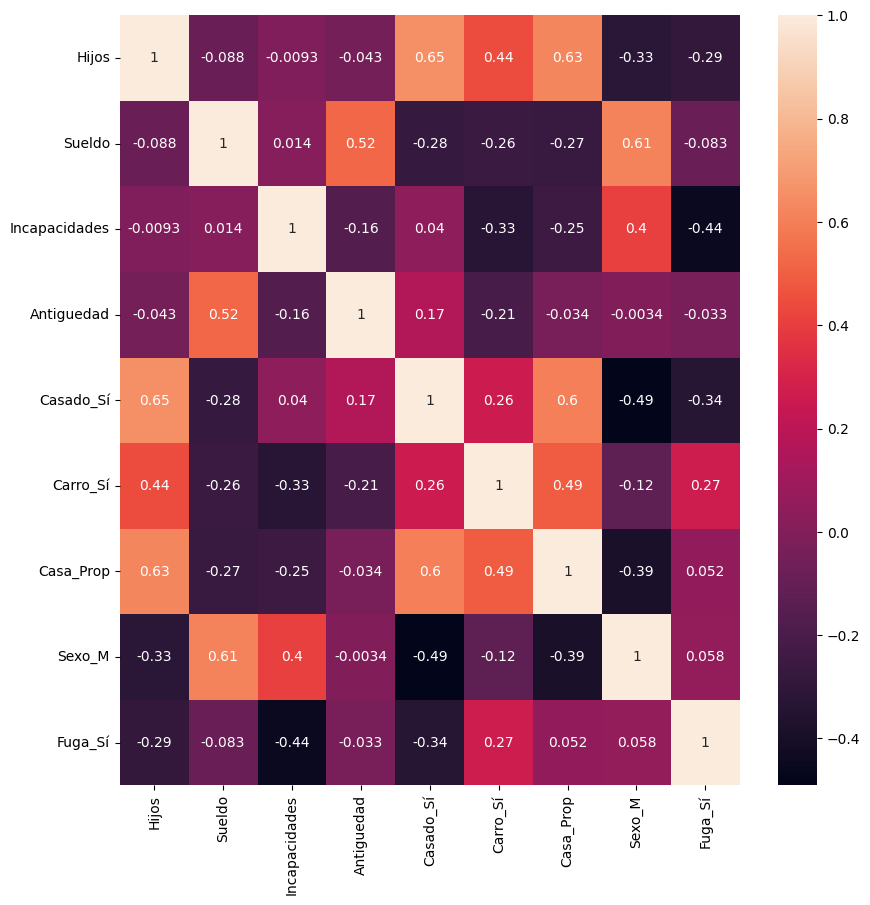

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

In [ ]:
# Detección de redundantes = se buscan correlaciones peligrosamente altas (0.8 - 1.0)

# data = data.drop('redundantes', axis = 1)
# data.head()

In [ ]:
# Detección de irrelevantes = se buscan correlaciones muy bajas (0.0 - 0.05) -> Última fila

data = data.drop('Antiguedad', axis = 1)
data.head()

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Fuga
0,Sí,No,0.0,Alquiler,H,10000.0,7.0,No
1,No,Sí,1.0,Alquiler,M,20000.0,3.0,Sí
2,Sí,Sí,2.0,Prop,H,15000.0,5.0,Sí
3,Sí,Sí,1.0,Alquiler,M,30000.0,15.0,No
4,Sí,Sí,0.0,Prop,H,10000.0,1.0,Sí


# ***6. Balanceo de datos (si es necesario)***

<ipython-input-36-091d4325a182>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Fuga']).plot(kind='bar')


<Axes: xlabel='Fuga'>

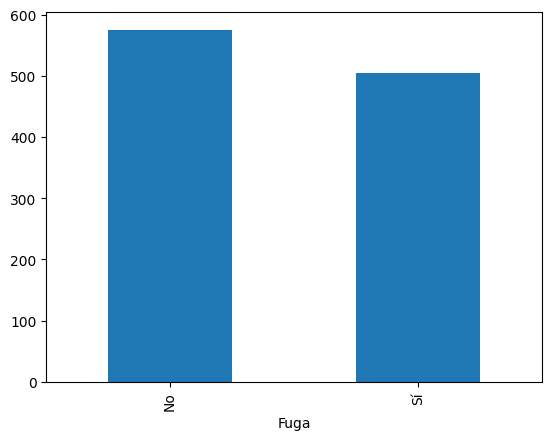

In [ ]:
# Variable objetivo
pd.value_counts(data['Fuga']).plot(kind='bar')

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

#sm = SMOTE( k_neighbors=2) para variables predictoras numéricas
#sm = SMOTENC(categorical_features=[], k_neighbors=2) para variables predictoras categóricas

sm = SMOTENC(categorical_features=[0,1,3,4], k_neighbors=2) #se indican las variables predictoras categoricas
X= data.drop('Fuga', axis=1) #Predictoras
Y= data['Fuga'] #Objetivo
X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo

<Axes: xlabel='Fuga'>

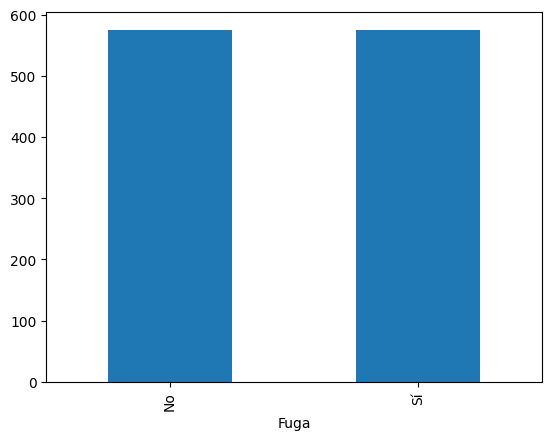

In [ ]:
# Creamos un dataframe con los resultados
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['Fuga']=Y_bal
data['Fuga'].value_counts().plot(kind='bar')

# ***7. Transformación de tipo de variable según método de ML***

* Si el metodo de ML es para variables categóricas (arboles, bayes, apriori) --> Discretización
* Si el mertodo de ML es para variables numéricas(RN, regresiones, SVM, Knn, Kmeans) --> Normalizar, dummies a las predictoras y labelencoder a la objetivo

## ***7.1 Discretización:*** Transformación de número a categoría

<Axes: xlabel='Incapacidades'>

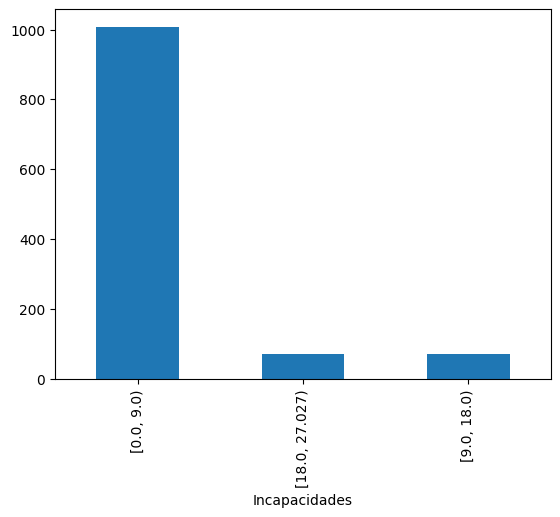

In [ ]:
#Cut
data_cat=data.copy()
data_cat['Incapacidades'] = pd.cut(data_cat['Incapacidades'] , bins=3, right = False)
data_cat['Incapacidades'].value_counts().plot(kind='bar')

<Axes: xlabel='Sueldo'>

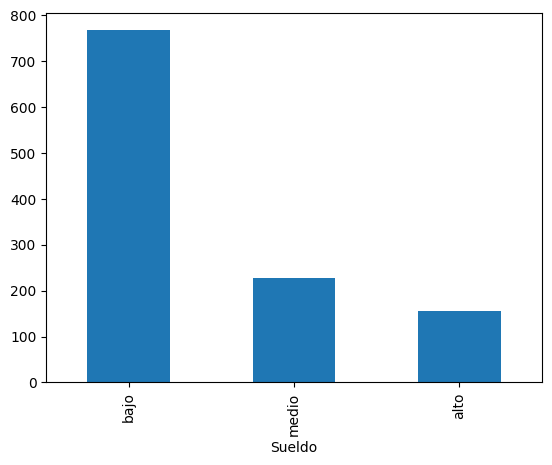

In [ ]:
data_cat['Sueldo'] = pd.cut(data_cat['Sueldo'] , bins=3, labels=['bajo','medio','alto'])
data_cat['Sueldo'].value_counts().plot(kind='bar')

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Fuga
0,Sí,No,"[0.0, 1.5)",Alquiler,H,bajo,"[0.0, 9.0)",No
1,No,Sí,"[0.0, 1.5)",Alquiler,M,bajo,"[0.0, 9.0)",Sí
2,Sí,Sí,"[1.5, 3.003)",Prop,H,bajo,"[0.0, 9.0)",Sí
3,Sí,Sí,"[0.0, 1.5)",Alquiler,M,medio,"[9.0, 18.0)",No
4,Sí,Sí,"[0.0, 1.5)",Prop,H,bajo,"[0.0, 9.0)",Sí
...,...,...,...,...,...,...,...,...
1145,No,Sí,"[0.0, 1.5)",Prop,M,bajo,"[0.0, 9.0)",Sí
1146,No,Sí,"[0.0, 1.5)",Alquiler,M,alto,"[0.0, 9.0)",Sí
1147,No,Sí,"[0.0, 1.5)",Alquiler,M,bajo,"[0.0, 9.0)",Sí
1148,Sí,Sí,"[0.0, 1.5)",Prop,H,bajo,"[0.0, 9.0)",Sí


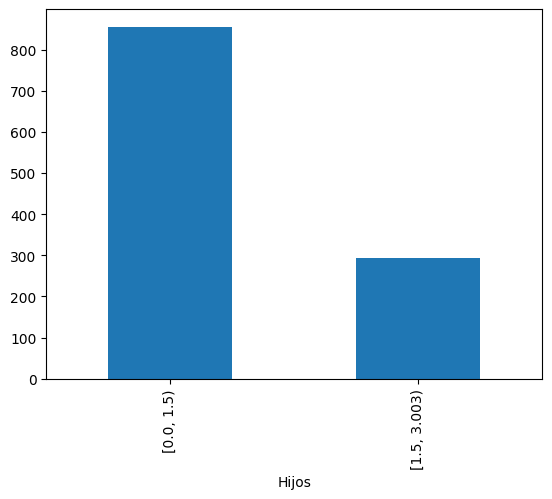

In [ ]:
data_cat['Hijos'] = pd.cut(data_cat['Hijos'] , bins=2, right = False)
data_cat['Hijos'].value_counts().plot(kind='bar')
data_cat

## ***7.2 Normalización de variables numéricas***

In [ ]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data[[ 'Hijos', 'Sueldo','Incapacidades']] = min_max_scaler.fit_transform(data[['Hijos', 'Sueldo','Incapacidades']])
data.head()

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Fuga
0,Sí,No,0.000000,Alquiler,H,0.047619,0.259259,No
1,No,Sí,0.333333,Alquiler,M,0.285714,0.111111,Sí
2,Sí,Sí,0.666667,Prop,H,0.166667,0.185185,Sí
3,Sí,Sí,0.333333,Alquiler,M,0.523810,0.555556,No
4,Sí,Sí,0.000000,Prop,H,0.047619,0.037037,Sí


## ***7.3 Dummies:*** Transformación de categorías a números

In [ ]:
#Variables categóricas con 2 categorías -> Borramos una dummy
data = pd.get_dummies(data, columns=['Casado','Carro','Casa','Sexo'], drop_first=True)

#Variables categóricas con más de 2 categorías -> No borramos
#data = pd.get_dummies(data, columns=['Cat'], drop_first=False)
data.head()

,Hijos,Sueldo,Incapacidades,Fuga,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M
0,0.000000,0.047619,0.259259,No,True,False,False,False
1,0.333333,0.285714,0.111111,Sí,False,True,False,True
2,0.666667,0.166667,0.185185,Sí,True,True,True,False
3,0.333333,0.523810,0.555556,No,True,True,False,True
4,0.000000,0.047619,0.037037,Sí,True,True,True,False


## ***7.4 Encoder:*** Solo para la variable objetivo

In [ ]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["Fuga"] = labelencoder.fit_transform(data["Fuga"])
data.head()

,Hijos,Sueldo,Incapacidades,Fuga,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M
0,0.000000,0.047619,0.259259,0,True,False,False,False
1,0.333333,0.285714,0.111111,1,False,True,False,True
2,0.666667,0.166667,0.185185,1,True,True,True,False
3,0.333333,0.523810,0.555556,0,True,True,False,True
4,0.000000,0.047619,0.037037,1,True,True,True,False


# ***8. Guardar los datos preparados***

In [ ]:
data_cat.to_excel("datos_categoricos.xlsx")

In [ ]:
data.to_excel("datos_numericos.xlsx")